In [1]:
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'A4'))
	print(os.getcwd())
except:
	pass

 # Assignment 4 Foundation of Data Analysis
 ## Author: Sam Higgs
 ### 1) SVD Image Compression Exercise
 Singular Vector Decomposition (SVD) is a popular tool for dimensionality reduction.
 The purpose of SVD is to break down a matrix into simpler components, making the calculations less costly.
 Given a matrix M x N, the simpler components are a U (m x m) matrix, a sigma (m x n) and a transposed V which is
 the transposition of (n x n).

 In the context of image compression, we want to reduce the dimensionality of our data, without effecting the
 images dimensions.
 We can display images as a matrix of values, where each pixel represents the light intensity (as we are using greyscale)
 The decomposition into U, sigma and VT enables us to approximate the original image, whilst using far less
 memory, whilst still giving us an accurate representation of the image.

In [2]:
import matplotlib.image as npim
import matplotlib.pyplot as plt
import matplotlib as mpl

from numpy.linalg import svd
from numpy import zeros, dot, diag, array
from ipywidgets import interact, interactive, fixed, interact_manual

from skimage.measure import compare_ssim


In [3]:
# Increase default figure-plotting quality
img = npim.imread("faculty.png")
mpl.rcParams['figure.dpi'] = 300

In [6]:
def measure_sim(imgA, imgB):
    (sim_score, diff) = compare_ssim(imgA, imgB, full=True)
    diff = (diff * 255).astype("uint8")
    return sim_score
def compress_and_show(img, compression):
    """
    Compress the greyscale image and display the plot.
    """
    recon_img = svd_compression(img, compression)
    sim_score = measure_sim(img, recon_img)

    print(f"Image similarity score: {sim_score:.2f}")
    
    f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(8,5))
    ax1.set_title("Original Image")
    ax1.imshow(img, cmap = 'gray')
    ax2.set_title("Compressed Image. Ratio:{:.2f}%".format(100*compression))
    ax2.imshow(recon_img, cmap = 'gray')
    ax2.axis('off')
    f.tight_layout()
    return sim_score

def svd_compression(img, compression):
    comp_ratio = int(compression*img.shape[0])
    U,s,VT = svd(img)
    # fig, axes = plt.subplots(3,1, sharey=True)
    # plt.plot(s)
    # plt.show()
    # plt.imshow(U, cmap='gray')
    # plt.show()
    # plt.imshow(VT, cmap='gray')
    # plt.show()
    # fig.tight_layout()
    return dot(U[:,:comp_ratio], dot(diag(s[:comp_ratio]), VT[:comp_ratio,:]))


 Below, you can move the slider between 0 and 1 (the compression ratio) to see the impact of
 of a large or small number of components. When the compression ratio is close to 1, the image is
 closest to the original depiction and has minimal to no compression.


In [7]:
interact(compress_and_show, compression=(0.00,1.00,0.02), img=fixed(img), continuous_update=False)



interactive(children=(FloatSlider(value=0.5, description='compression', max=1.0, step=0.02), Output()), _dom_c…

<function __main__.compress_and_show(img, compression)>

Text(0, 0.5, 'Similarity Score Ratio')

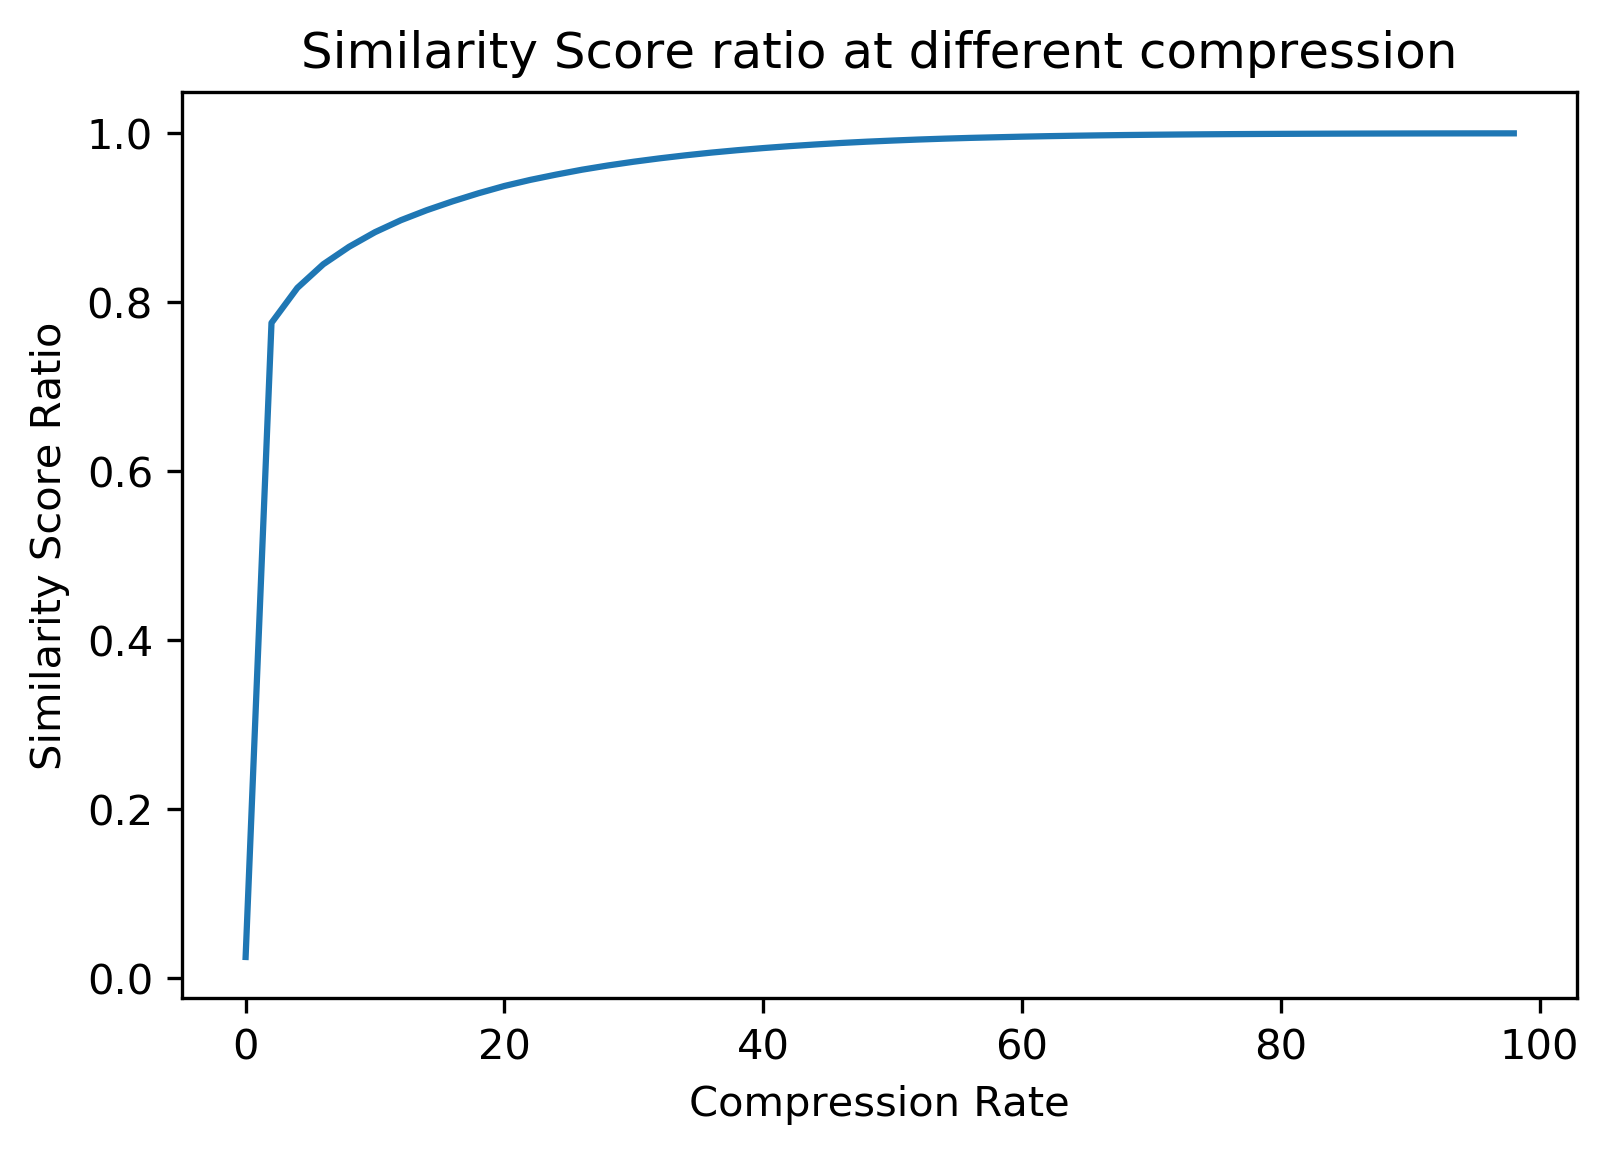

In [21]:
sim_scores = []
for i in range(0,100,2):
    sim_scores.append([i, measure_sim(img, svd_compression(img, i/100))])

sim_scores = array(sim_scores)

plt.plot(sim_scores[:,0], sim_scores[:,1])
plt.title('Similarity Score ratio at different compression')
plt.xlabel('Compression Rate')
plt.ylabel('Similarity Score Ratio')

 ### 2) Comparing PCA vs. SVD

In [0]:
# Hint: Useful for 2c & d)
from sklearn.preprocessing import StandardScaler



